In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [36]:
import matplotlib.font_manager as fm  # 폰트확인 
font_list = [font.name for font in fm.fontManager.ttflist] # 설치된 폰트 확인 
font_list
plt.rcParams['font.family'] = 'Apple SD Gothic Neo' #폰트 변경 

In [48]:
import seaborn as sns
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
#2.결측데이터
def  결측_table(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        res= pd.concat([null_val, percent], axis=1)
        res_table_ren_columns = res.rename(
        columns = {0 : '결측값', 1 : '%'})
        return res_table_ren_columns
결측_table(titanic)    

,결측값,%
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,177,19.865320
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,2,0.224467
class,0,0.000000
who,0,0.000000


ValueError: Cannot use `hue` without `x` and `y`

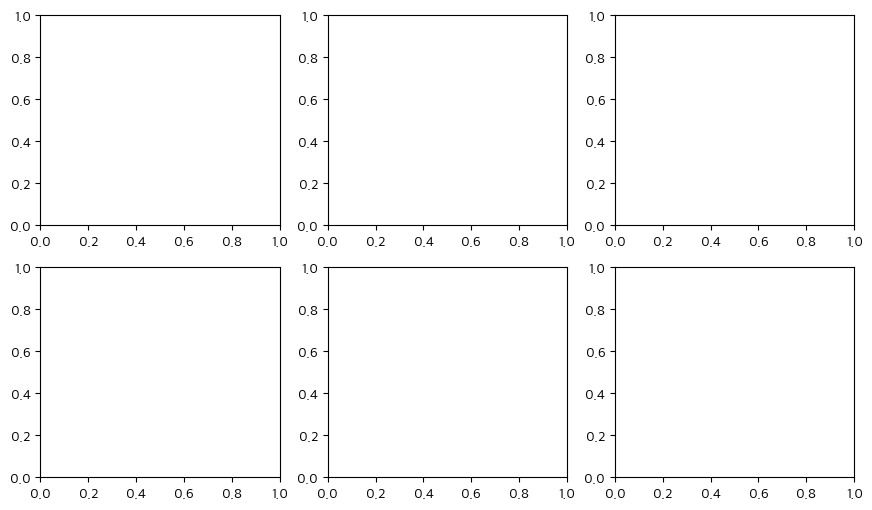

In [49]:
#3 Seaborn 카운트플롯
cols = ['survived', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(titanic[cols[i]], hue=titanic["survived"], ax=ax)
        ax.set_title(cols[i], fontsize=14, fontweight='bold')
        ax.legend(title="survived", loc='upper center') 

plt.tight_layout()   

#### 3의 결과를 확인하고 그래프로 데이터를 확인해보자.
- 남성보다 여성이 생존 할 확률이 높다. -> 여성이나 아이가 먼저 대피하지 않았을까? 
- pclass가 높으면 생존할 확률이 높다. -> 부자면 먼저 생존하나?
- 가족이 없는 사람이 생존률이 낮을까 -> parch 0인 사람의 생존률이 조금높다
                               가족이 없는 사람보다 생존률이 높다.

In [40]:
#4 Seaborn Distplots
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(titanic, row='sex', col='pclass', hue='survived', margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

TypeError: __init__() got an unexpected keyword argument 'size'

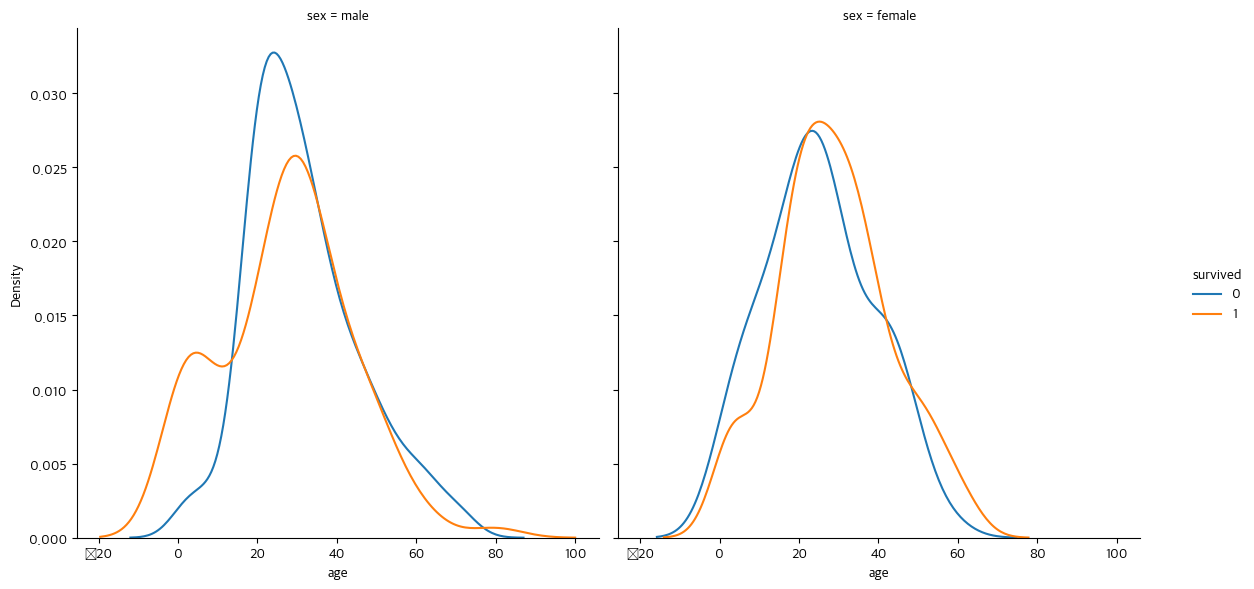

In [41]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(titanic, col='sex', hue='survived', margin_titles=True, height=6, aspect=1.0)
g.map(sns.distplot, 'age', kde=True, bins=bins, hist=False)
g.add_legend()  
plt.show()  

1) 남성은 pclass가 1일 때, 또는 5세 이하일 때 생존할 확률이 높다.

2) 여성 생존 확률이 가장 낮은 것은 pclass3에서 40~60 이면 40세 이상일 때이다.

3) pclass 3에서 대부분의 승객은 남성이며 20~30(15~25)정도 범위에 있다.

4) 전체적으로 15~30세 정도의 남성의 생존률이 낮다.

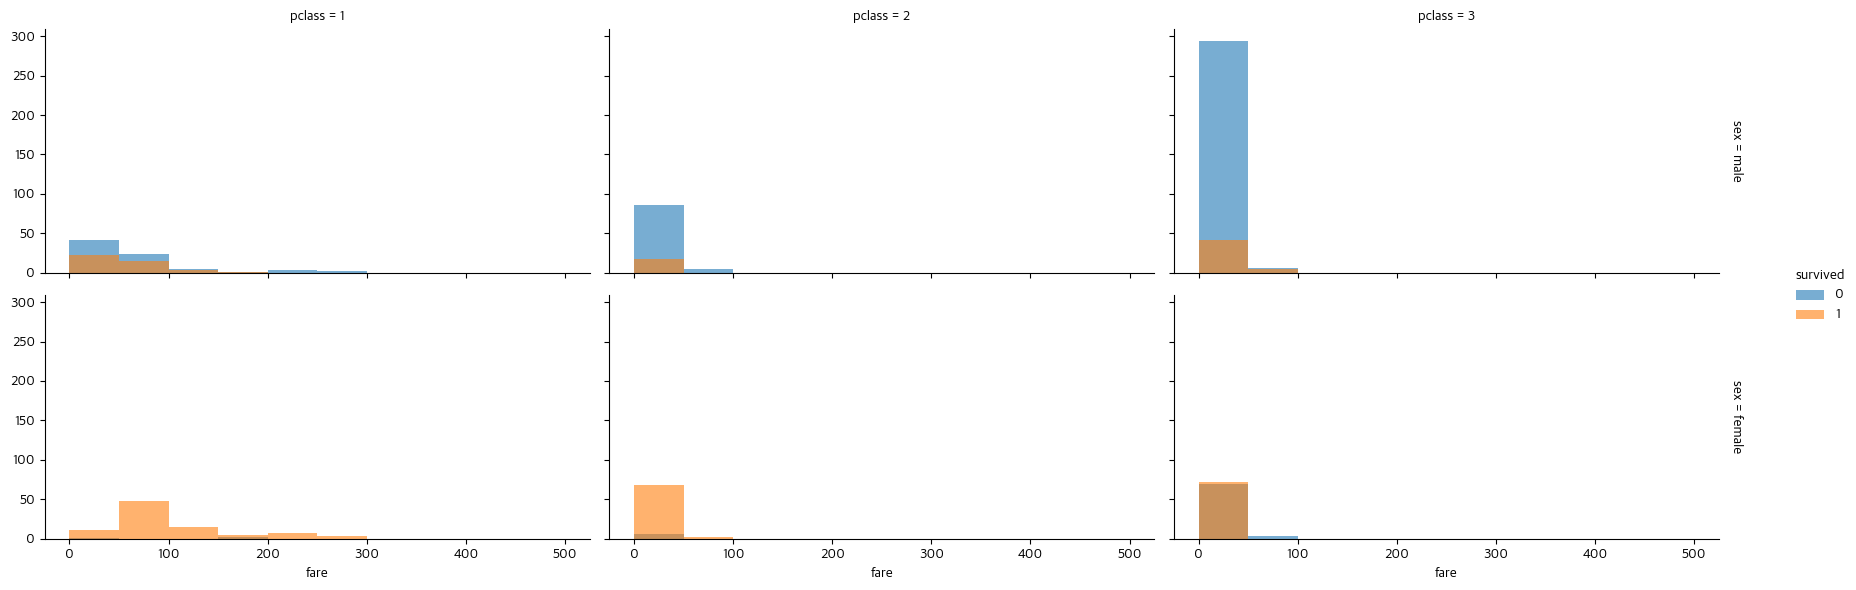

In [42]:
titanic['fare'].max()
#output: 512.3292
bins = np.arange(0, 550, 50)
g = sns.FacetGrid(titanic, row='sex', col='pclass', hue='survived', margin_titles=True, height=3, aspect=2.0)
g.map(sns.distplot, 'fare', kde=False, bins=bins,hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

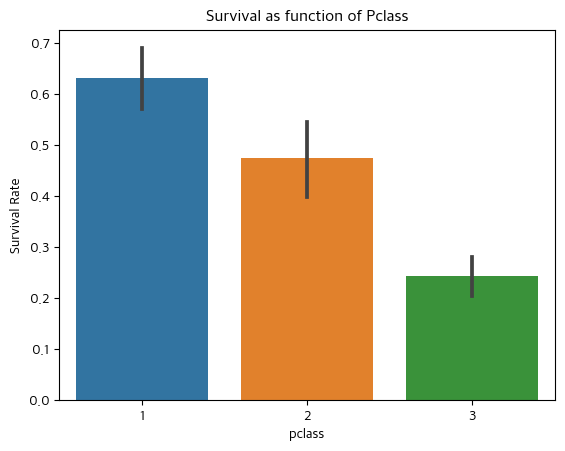

In [43]:
#5. 막대그래프 
sns.barplot(x='pclass', y='survived', data=titanic);
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

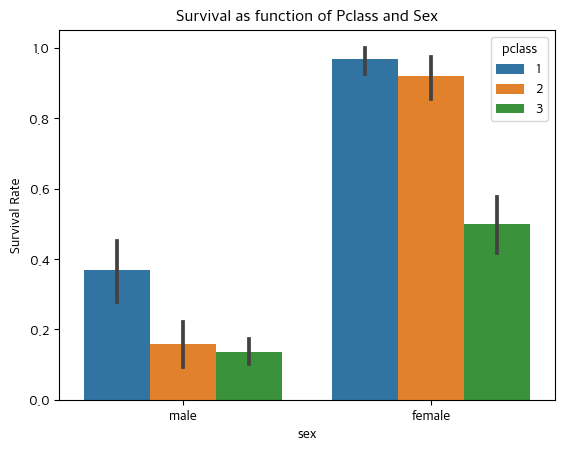

In [44]:
sns.barplot(x='sex', y='survived', hue='pclass', data=titanic)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

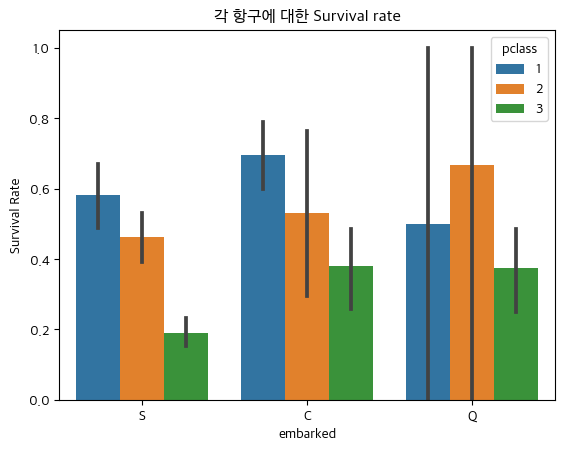

In [45]:
sns.barplot(x='embarked', y='survived', hue='pclass', data=titanic)
plt.ylabel("Survival Rate")
plt.title("각 항구에 대한 Survival rate")
plt.show()

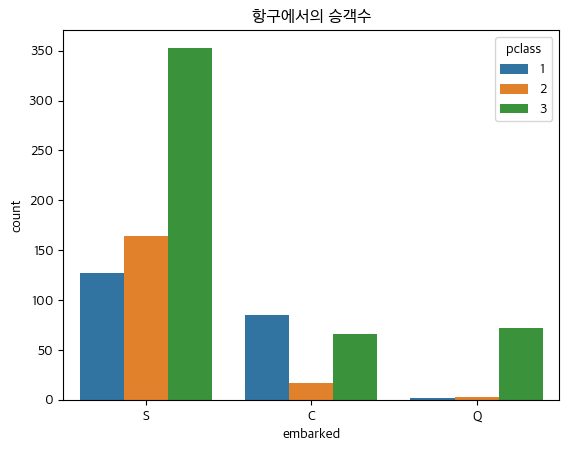

In [46]:
sns.countplot(x='embarked', hue='pclass', data=titanic)
plt.title("항구에서의 승객수")
plt.show()

AttributeError: PathCollection.set() got an unexpected keyword argument 'split'

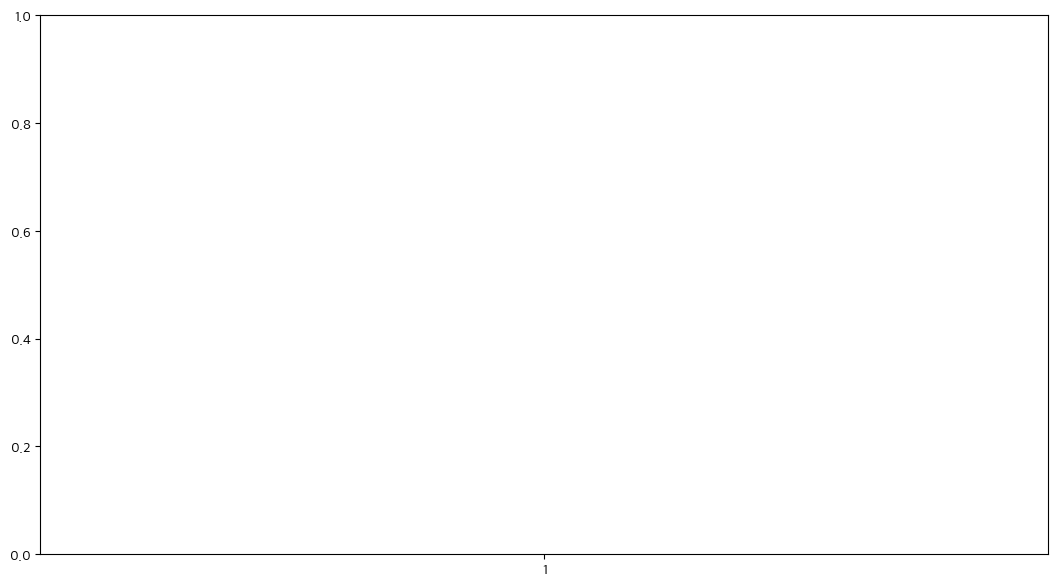

In [51]:
#choose color
cm_surv = ["darkgrey" , "lightgreen"]

#plot swarm
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='pclass', y='age', hue='survived', split=True, data=titanic , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

#plot violin
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x="pclass", y="age", hue='survived', data=titanic, split=True, bw=0.05 , palette=cm_surv, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()